In [30]:
from pandas import read_csv
from pandas.plotting import scatter_matrix
import numpy as np
import matplotlib.pyplot as pl

# Loading and pre-processing
Let's load and have a first look at the raw data

In [31]:
train_data = read_csv('../data/train.csv')

In [38]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [34]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Before continuing, let's just define the meaning of the data labels, for clarity:

| Variable     | Definition                                 |  Key                                    |
|--------------|--------------------------------------------|-----------------------------------------|
| PassengerId  | ID of the passenger                        |                                         |
| Name         | passenger name                             |                                         |
| Survived     | passenger survived                         | 0=No, 1=Yes                             |
| Pclass       | Ticket class                               | 1=1st, 2=2nd, 3=3rd                     |
| Sex          | passenger's gender                         | male, female                            |
| Age          | passenger's age                            | (in years)                              |
| SibSp        | # of siblings / spouses aboard the Titanic |                                         |
| Parch        | # of parents / children aboard the Titanic |                                         |
| Ticket       | Ticket number                              |                                         |
| Fare         | Paid fare                                  |                                         |
| Cabin        | cabin number (if applicable)               |                                         |
| Parch        | # of parents / children aboard the Titanic |                                         |
| Embarked     | Port of embarcation                        | C=Cherbourg, Q=Queenstown, S=Southampton|


## Splitting the dataset 
Not all the information contained in the dataset is useful for our purposes so it is worth parsing the data to extract only the relevant features. For example, the name, ticket number or the cabin number are not usable features, since they are unique to each passenger. 

This can be done using pandas `drop` method

In [51]:
clean_train_data = train_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

Additionally, the survival field is the target label so it should be separated.

In [54]:
target_train = train_data.Survived
clean_train_data = clean_train_data.drop('Survived', axis=1)
clean_train_data

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S
5,3,male,NaN,0,0,8.4583,Q
6,1,male,54.0,0,0,51.8625,S
7,3,male,2.0,3,1,21.0750,S
8,3,female,27.0,0,2,11.1333,S
9,2,female,14.0,1,0,30.0708,C


# Exploratory analysis
To begin having a feel for the data, let's look at some of its statistical properties.

## Descriptive statistics
Let's start by having a look at the characteristics of the passangers.
NOTE: in these examples, I will primarily use standard numpy, scipy, matplotlib and so on but there are dedicated functions in pandas to do these things in a more standardized way. I'm just not very familiar with them..

In [55]:
clean_train_data.describe()

,Pclass,Age,SibSp,Parch,Fare
count,891.000000,714.000000,891.000000,891.000000,891.000000
mean,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,20.125000,0.000000,0.000000,7.910400
50%,3.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,38.000000,1.000000,0.000000,31.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200


/home/neuro/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


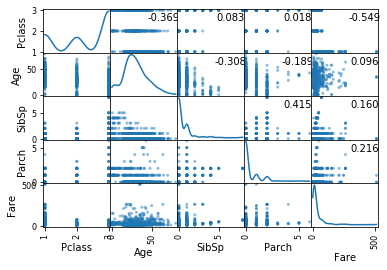

In [58]:
axes = scatter_matrix(clean_train_data, alpha=0.5, diagonal='kde')
corr = clean_train_data.corr().as_matrix()
for i, j in zip(*np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')

(array([1.60355651e-02, 2.32209002e-03, 6.79101799e-04, 4.38130193e-05,
        2.40971606e-04, 1.31439058e-04, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 6.57195289e-05]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <a list of 10 Patch objects>)

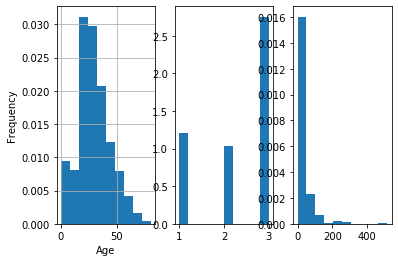

In [62]:
fig = figure()
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

ax1.hist(train_data['Age'], density=True)
ax1.set_xlabel('Age')
ax1.set_ylabel('Frequency')
ax1.grid()

ax2.hist(train_data['Pclass'], density=True)

ax3.hist(train_data['Fare'], density=True)